In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append('C:/Users/Petr.Yurchenko/McKinsey_Severstal_Hack_2022')
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

from server2022.src.train_val import *
from server2022.src.model import *
from server2022.data.processed.prepare_data import *

In [2]:
#df = create_df_0years_known()
df = create_df_1year_known()

In [3]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]
# df = df.fillna(0)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [4]:
df.head(3)

,Наименование ДП,Итого,"-4, Нематериальные активы, RUB","-3, Нематериальные активы, RUB","-2, Нематериальные активы, RUB","-1, Нематериальные активы, RUB","-4, Основные средства , RUB","-3, Основные средства , RUB","-2, Основные средства , RUB","-1, Основные средства , RUB","-4, Внеоборотные активы, RUB","-3, Внеоборотные активы, RUB","-2, Внеоборотные активы, RUB","-1, Внеоборотные активы, RUB","-4, Дебиторская задолженность, RUB","-3, Дебиторская задолженность, RUB","-2, Дебиторская задолженность, RUB","-1, Дебиторская задолженность, RUB","-4, Оборотные активы, RUB","-3, Оборотные активы, RUB","-2, Оборотные активы, RUB","-1, Оборотные активы, RUB","-4, Уставный капитал , RUB","-3, Уставный капитал , RUB","-2, Уставный капитал , RUB","-1, Уставный капитал , RUB","-4, Капитал и резервы, RUB","-3, Капитал и резервы, RUB","-2, Капитал и резервы, RUB","-1, Капитал и резервы, RUB","-4, Заёмные средства (долгосрочные), RUB","-3, Заёмные средства (долгосрочные), RUB","-2, Заёмные средства (долгосрочные), RUB","-1, Заёмные средства (долгосрочные), RUB","-4, Долгосрочные обязательства, RUB","-3, Долгосрочные обязательства, RUB","-2, Долгосрочные обязательства, RUB","-1, Долгосрочные обязательства, RUB","-4, Заёмные средства (краткосрочные), RUB","-3, Заёмные средства (краткосрочные), RUB","-2, Заёмные средства (краткосрочные), RUB","-1, Заёмные средства (краткосрочные), RUB","-4, Кредиторская задолженность, RUB","-3, Кредиторская задолженность, RUB","-2, Кредиторская задолженность, RUB","-1, Кредиторская задолженность, RUB","-4, Краткосрочные обязательства, RUB","-3, Краткосрочные обязательства, RUB","-2, Краткосрочные обязательства, RUB","-1, Краткосрочные обязательства, RUB","-4, Выручка, RUB","-3, Выручка, RUB","-2, Выручка, RUB","-1, Выручка, RUB","-4, Себестоимость продаж, RUB","-3, Себестоимость продаж, RUB","-2, Себестоимость продаж, RUB","-1, Себестоимость продаж, RUB","-4, Прибыль (убыток) до налогообложения , RUB","-3, Прибыль (убыток) до налогообложения , RUB","-2, Прибыль (убыток) до налогообложения , RUB","-1, Прибыль (убыток) до налогообложения , RUB","-4, Прибыль (убыток) от продажи, RUB","-3, Прибыль (убыток) от продажи, RUB","-2, Прибыль (убыток) от продажи, RUB","-1, Прибыль (убыток) от продажи, RUB",year,binary_target,"Макс. ПДЗ за -1 год, дней","Сред. ПДЗ за -1 год, дней","Кол-во просрочек свыше 5-ти дней за -1 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.","Кол-во раз ПДЗ за -1 год, шт.",Нематериальные активы total mean growth,Основные средства total mean growth,Внеоборотные активы total mean growth,Дебиторская задолженность total mean growth,Оборотные активы total mean growth,Уставный капитал total mean growth,Капитал и резервы total mean growth,Заёмные средства (долгосрочные) total mean growth,Долгосрочные обязательства total mean growth,Заёмные средства (краткосрочные) total mean growth,Кредиторская задолженность total mean growth,Краткосрочные обязательства total mean growth,Выручка total mean growth,Себестоимость продаж total mean growth,Прибыль (убыток) до налогообложения total mean growth,Прибыль (убыток) от продажи total mean growth,"log -4, Нематериальные активы, RUB","log -3, Нематериальные активы, RUB","log -2, Нематериальные активы, RUB","log -1, Нематериальные активы, RUB","log -4, Основные средства , RUB","log -3, Основные средства , RUB","log -2, Основные средства , RUB","log -1, Основные средства , RUB","log -4, Внеоборотные активы, RUB","log -3, Внеоборотные активы, RUB","log -2, Внеоборотные активы, RUB",...,"log -4, Прибыль (убыток) от продажи, RUB","log -3, Прибыль (убыток) от продажи, RUB","log -2, Прибыль (убыток) от продажи, RUB","log -1, Прибыль (убыток) от продажи, RUB","Нематериальные активы ,прирост за -3 год","Нематериальные активы ,прирост за -2 год","Нематериальные активы ,прирост за -1 год","Основные средства ,прирост за -3 год","Основные средства ,прирост за -2 год","Основные средства ,прирост за -1 год","Внеоборотные активы ,прирост за -3 год","Внеоборотные активы ,пр

In [5]:
# new_cols = []
# for col in df.columns:
#     for m in ['Основные средства', 
#             'Внеоборотные активы',
#             'Дебиторская задолженность',
#             'Оборотные активы',
#             'Кредиторская задолженность',
#              'Краткосрочные обязательства']:
#         if m in col:
#             new_cols.append(col)

In [55]:
ness_cols = ['Наименование ДП', 'Итого', 'year', 'binary_target'] + \
['Макс. ПДЗ за -1 год, дней',
 'Сред. ПДЗ за -1 год, дней',
 'Кол-во просрочек свыше 5-ти дней за -1 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.']

In [51]:
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

0.9692520775623269

In [93]:
5.99484250e-04

0.00059948425

In [92]:
np.logspace(-6, -1, 10)

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C226D850> with treshold = 0.5...


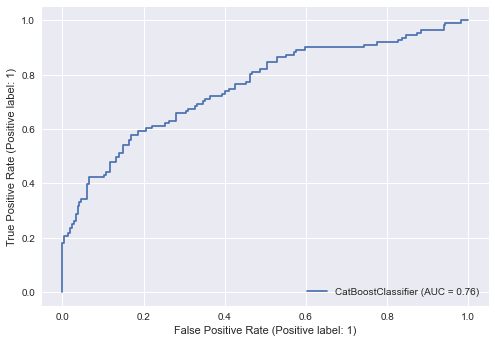

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


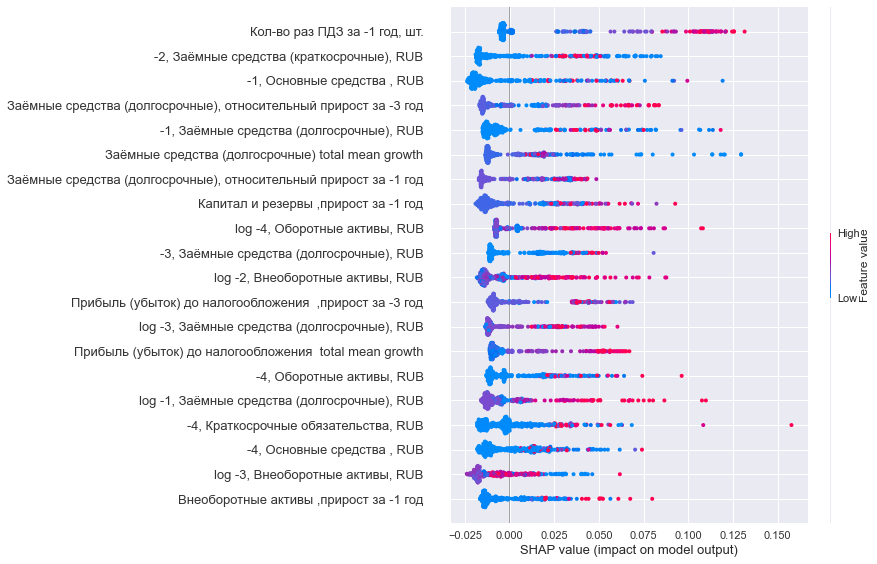

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7553
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C226D850> with treshold = 0.0...


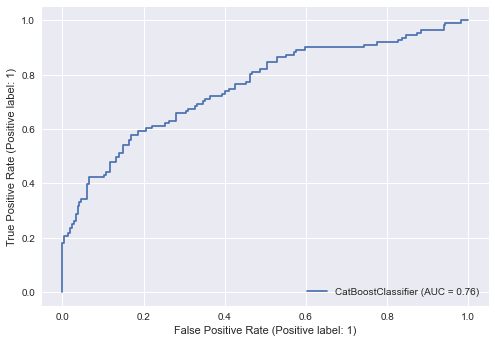

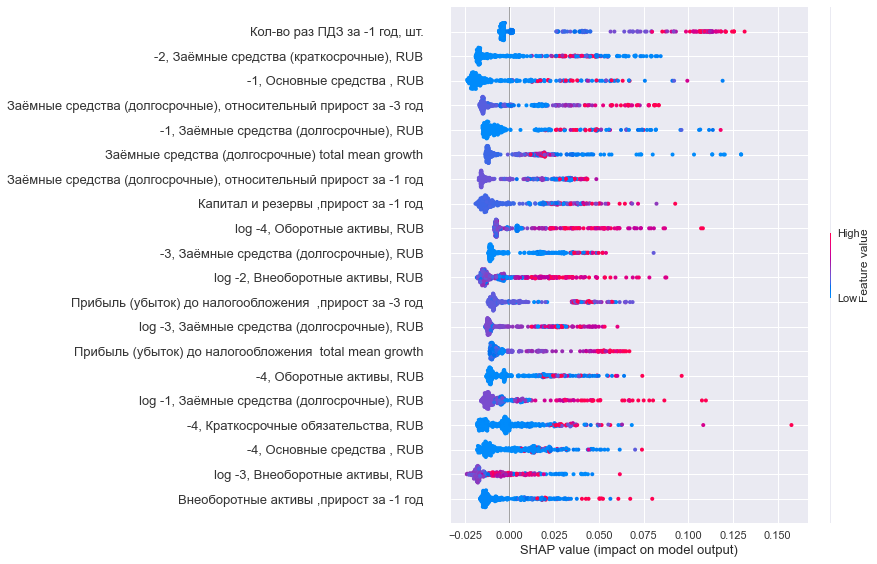

F1 = 0.6083, Precision = 0.6226, Recall = 0.5946, Accuracy = 0.7385, ROC_AUC = 0.7553
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C38C7F40> with treshold = 0.5...


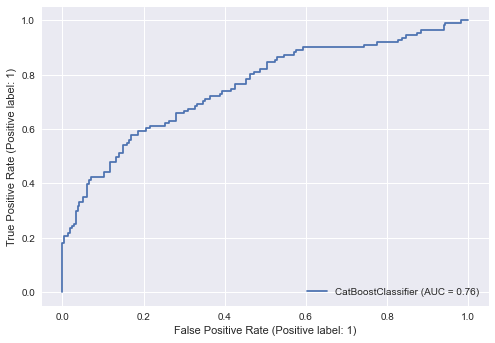

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


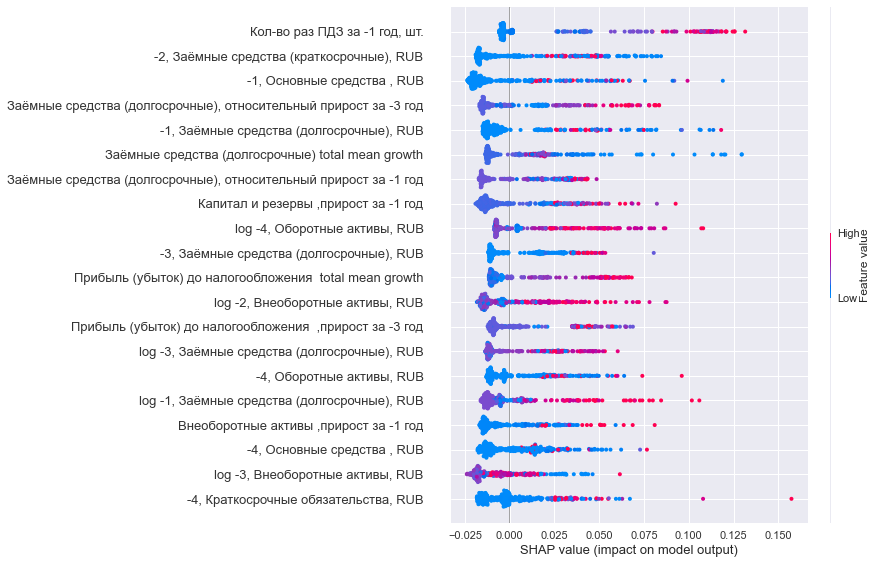

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7557
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C38C7F40> with treshold = 0.0...


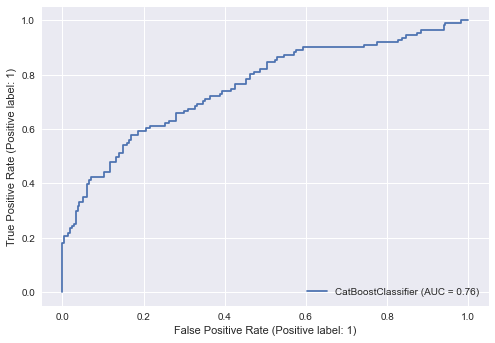

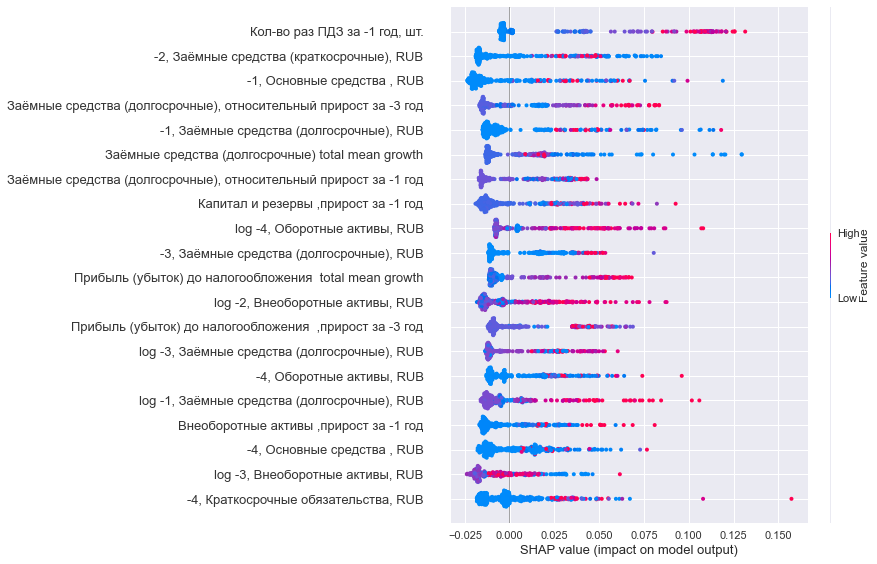

F1 = 0.6083, Precision = 0.6226, Recall = 0.5946, Accuracy = 0.7385, ROC_AUC = 0.7557
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C406DD30> with treshold = 0.5...


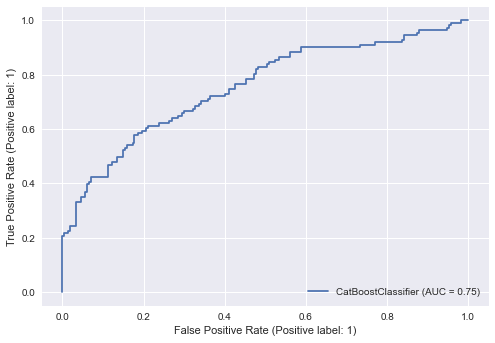

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


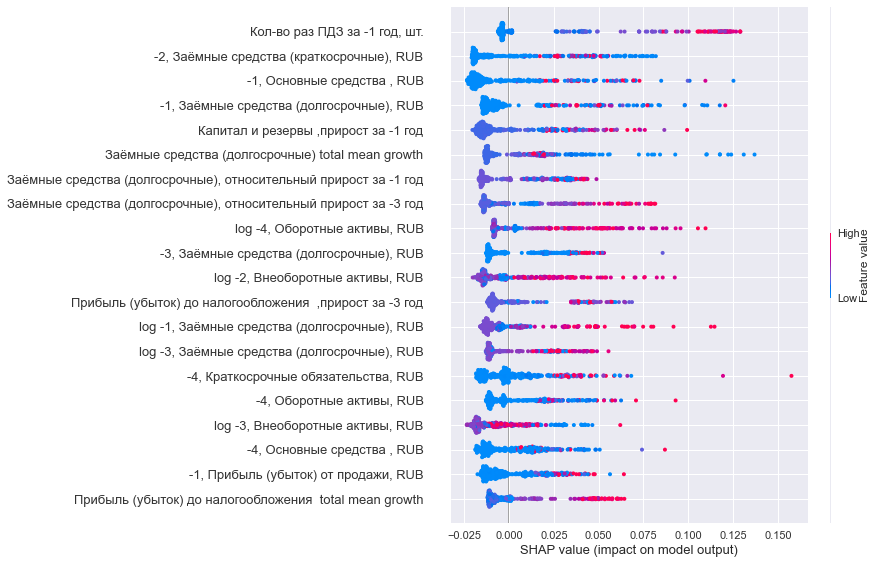

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7546
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C406DD30> with treshold = 0.0...


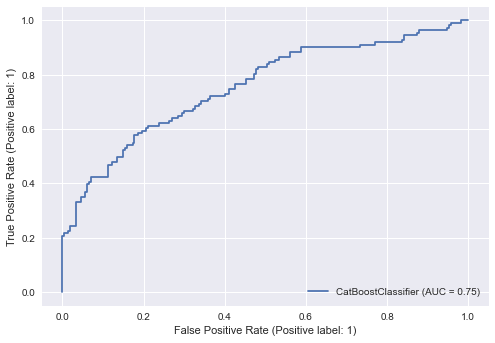

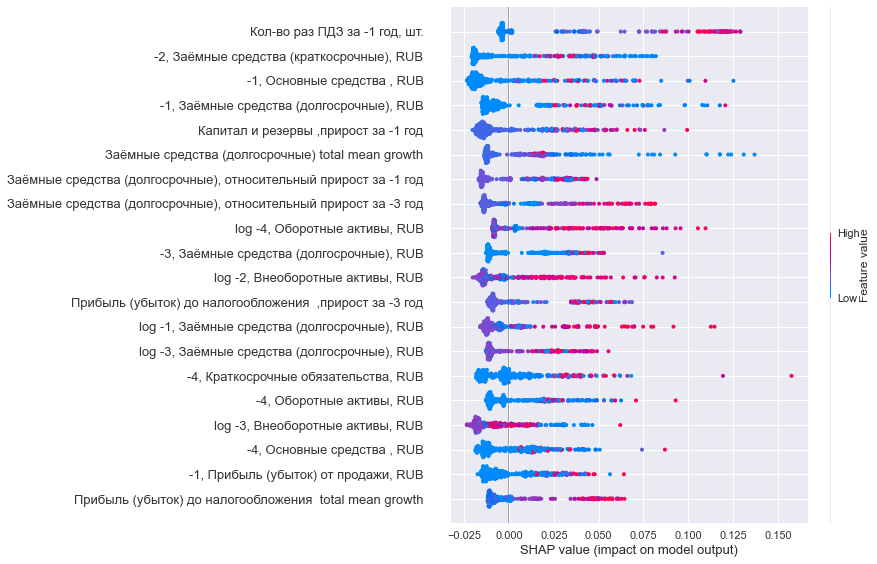

F1 = 0.6071, Precision = 0.6018, Recall = 0.6126, Accuracy = 0.7292, ROC_AUC = 0.7546
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1BB6FA0> with treshold = 0.5...


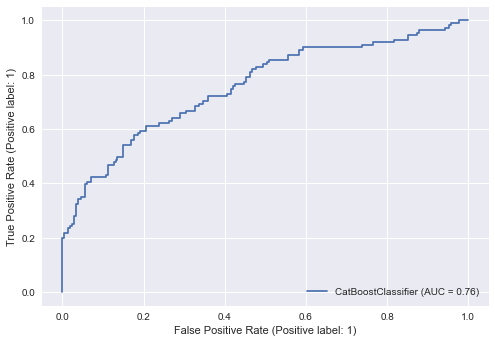

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


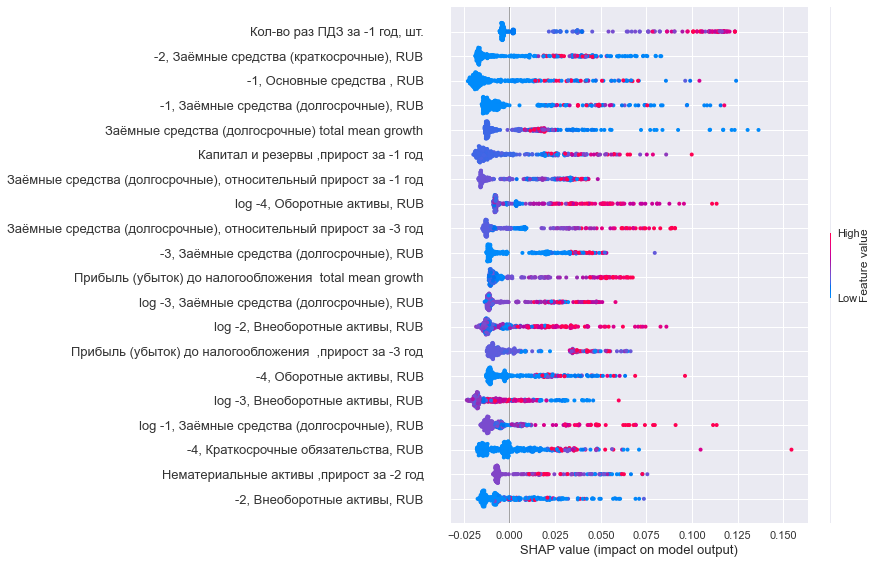

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7557
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1BB6FA0> with treshold = 0.0...


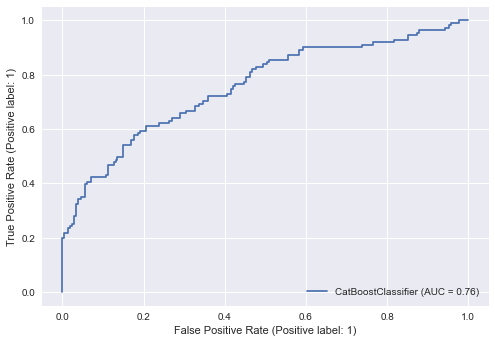

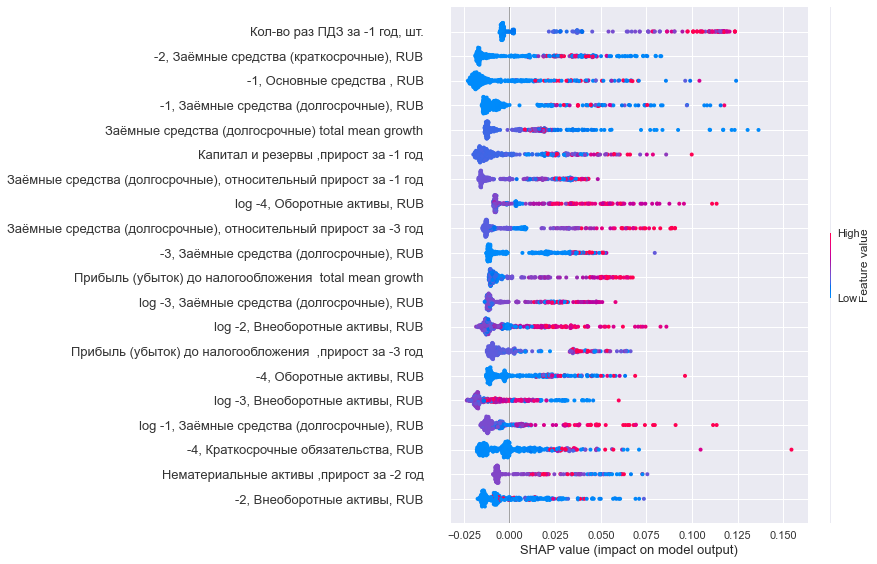

F1 = 0.6099, Precision = 0.6071, Recall = 0.6126, Accuracy = 0.7323, ROC_AUC = 0.7557
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2279670> with treshold = 0.5...


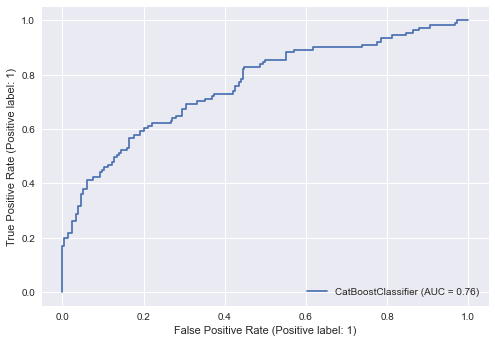

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


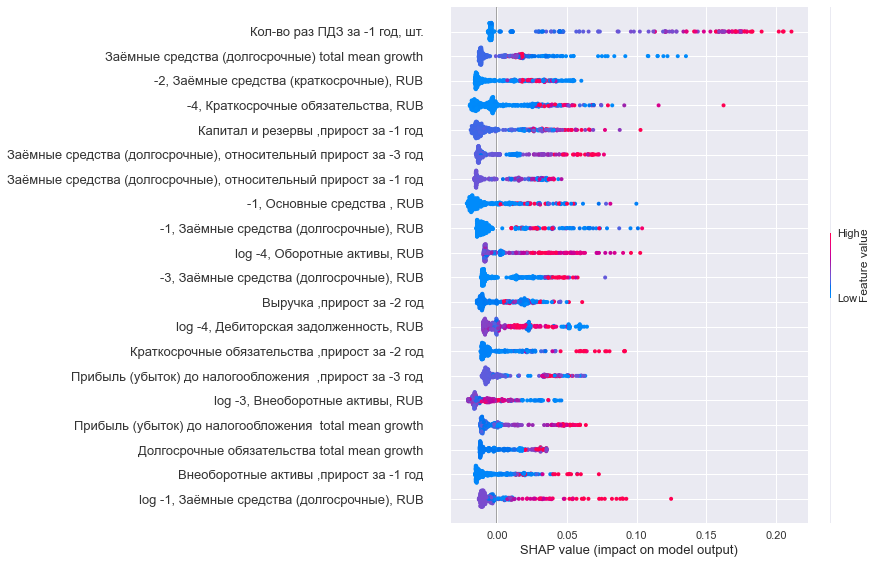

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7611
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2279670> with treshold = 0.0...


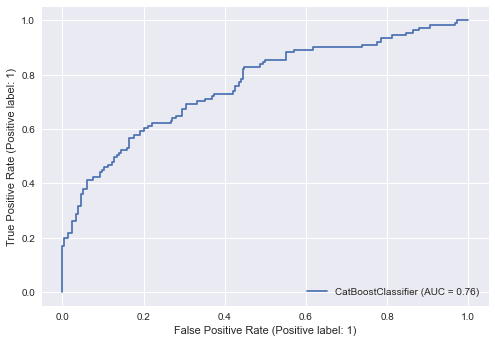

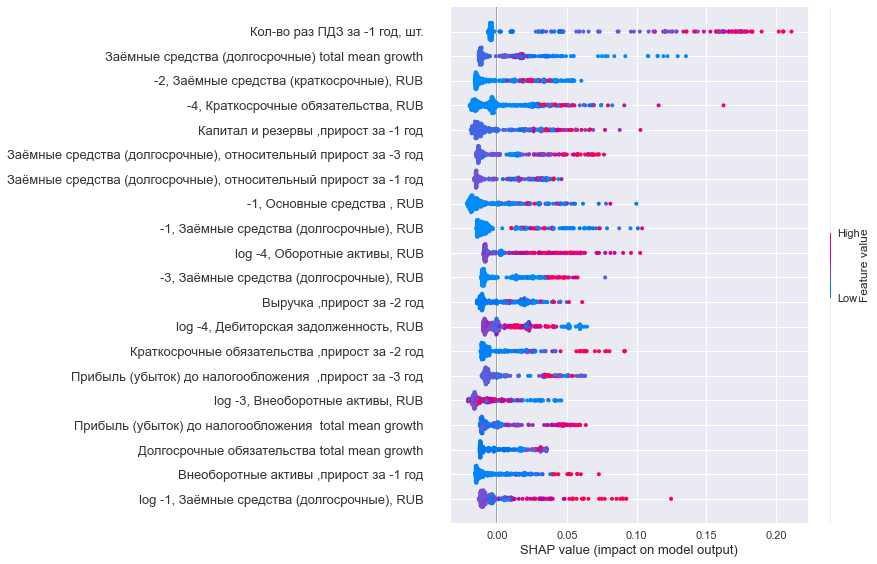

F1 = 0.6154, Precision = 0.4894, Recall = 0.8288, Accuracy = 0.6462, ROC_AUC = 0.7611
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2279610> with treshold = 0.5...


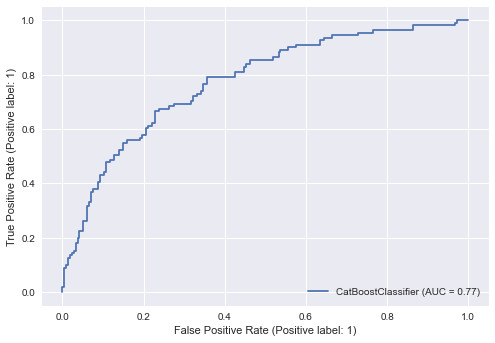

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


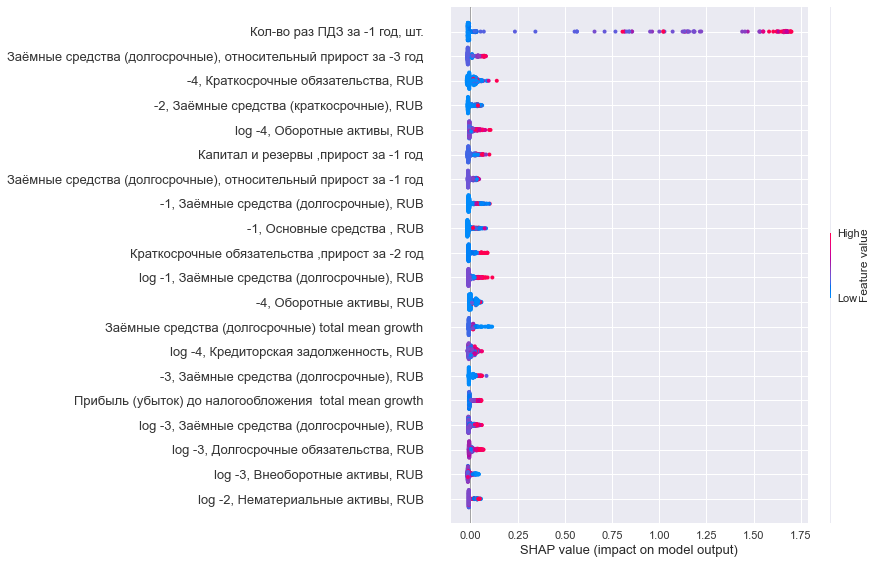

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7742
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2279610> with treshold = 0.0...


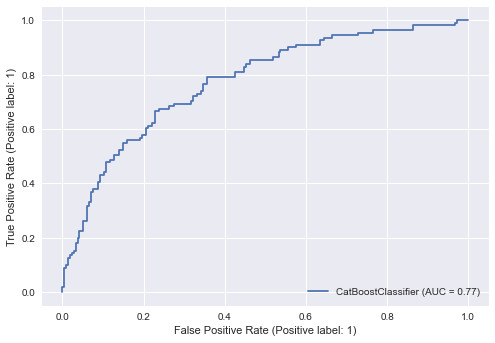

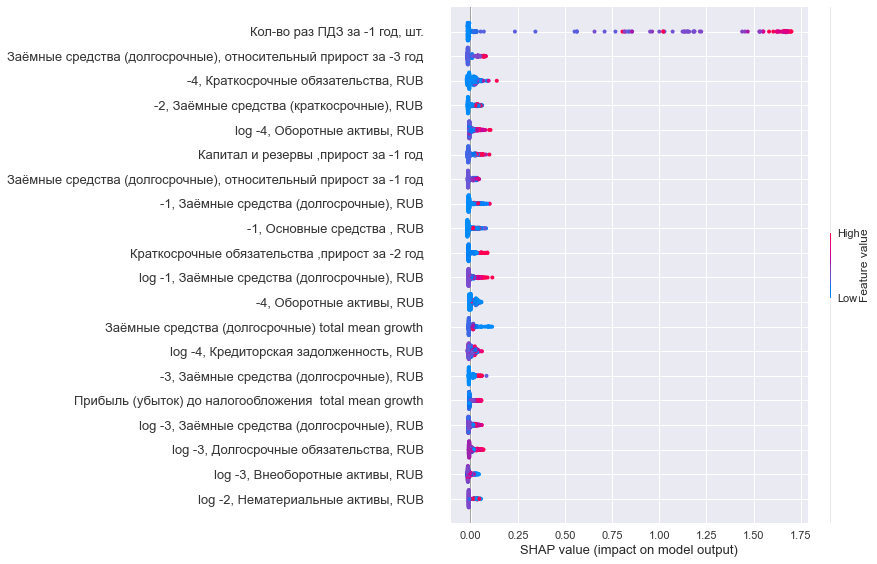

F1 = 0.64, Precision = 0.5366, Recall = 0.7928, Accuracy = 0.6954, ROC_AUC = 0.7742
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2C42700> with treshold = 0.5...


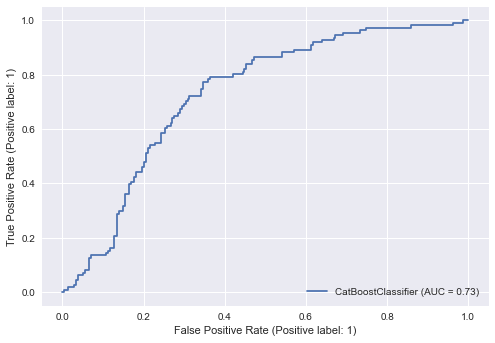

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


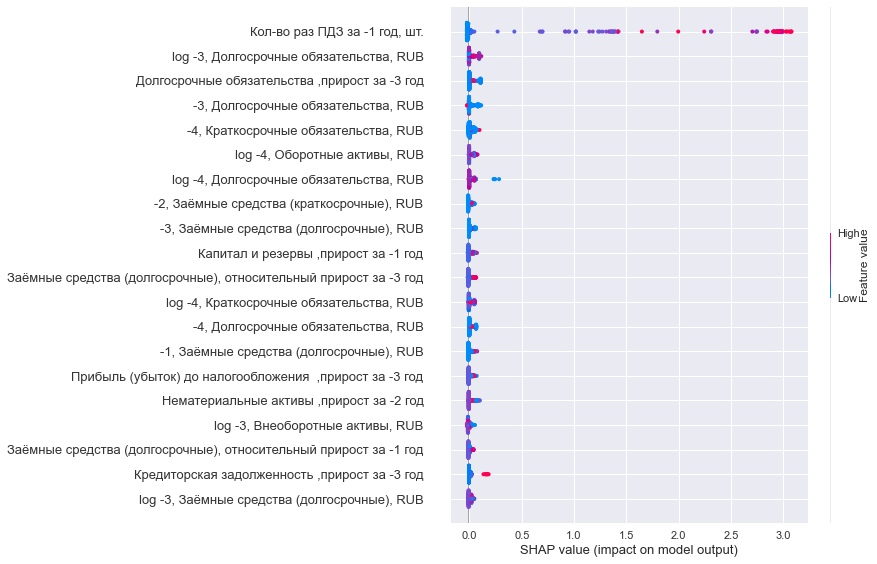

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7281
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2C42700> with treshold = 0.0...


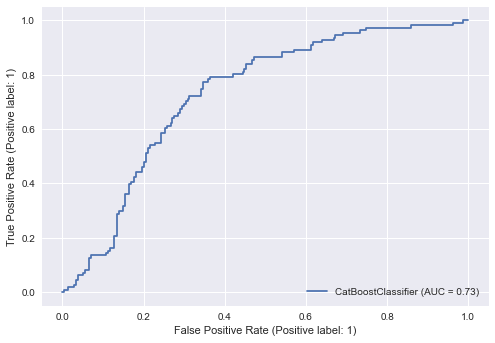

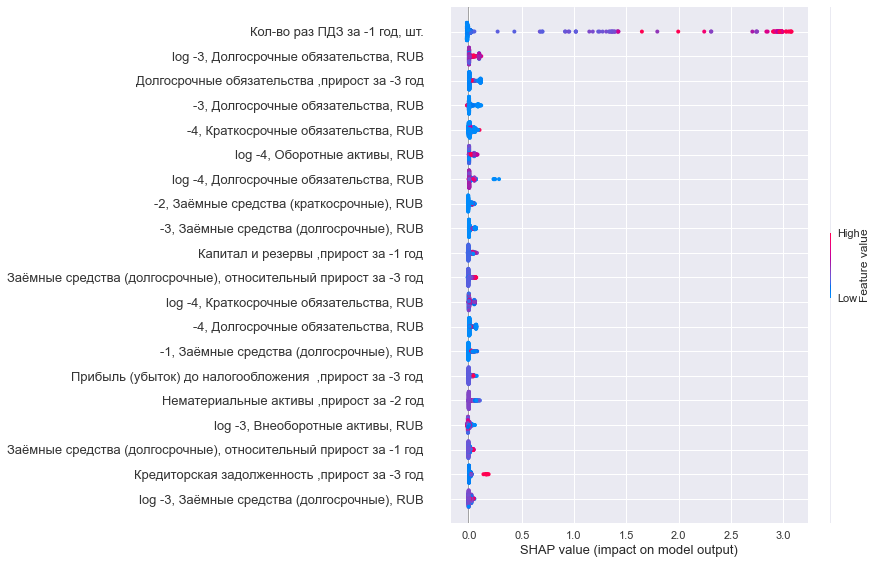

F1 = 0.6354, Precision = 0.5301, Recall = 0.7928, Accuracy = 0.6892, ROC_AUC = 0.7281
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C221E040> with treshold = 0.5...


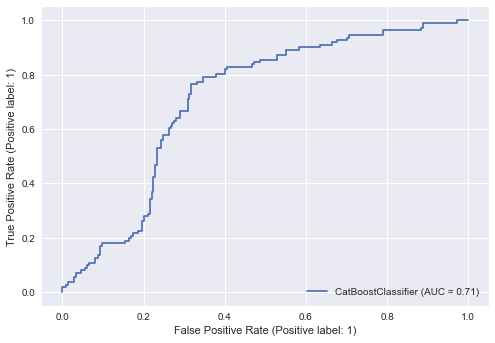

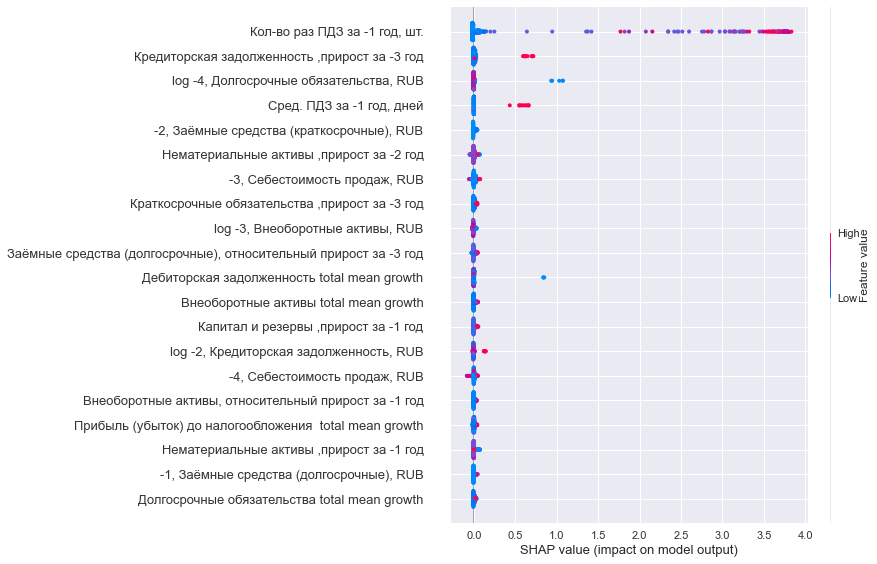

F1 = 0.0678, Precision = 0.5714, Recall = 0.036, Accuracy = 0.6615, ROC_AUC = 0.7099
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C221E040> with treshold = 0.02...


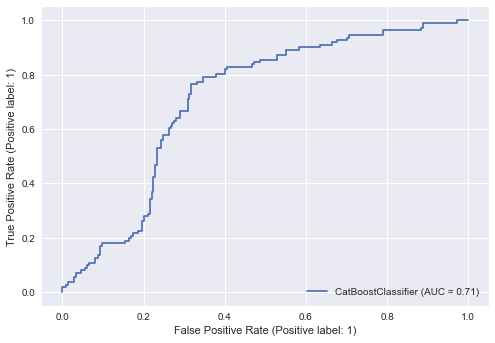

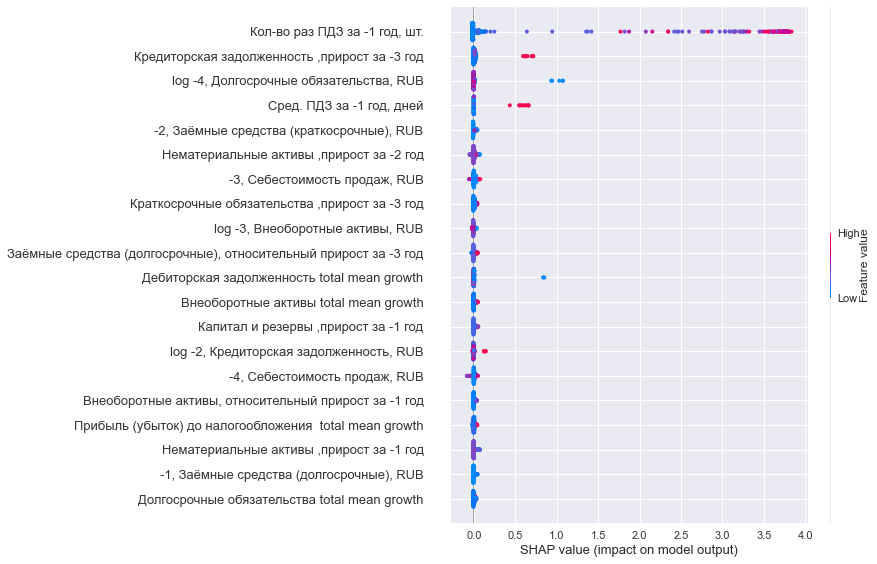

F1 = 0.6447, Precision = 0.5432, Recall = 0.7928, Accuracy = 0.7015, ROC_AUC = 0.7099
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1C73670> with treshold = 0.5...


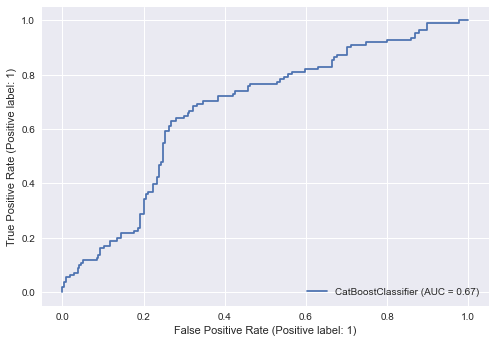

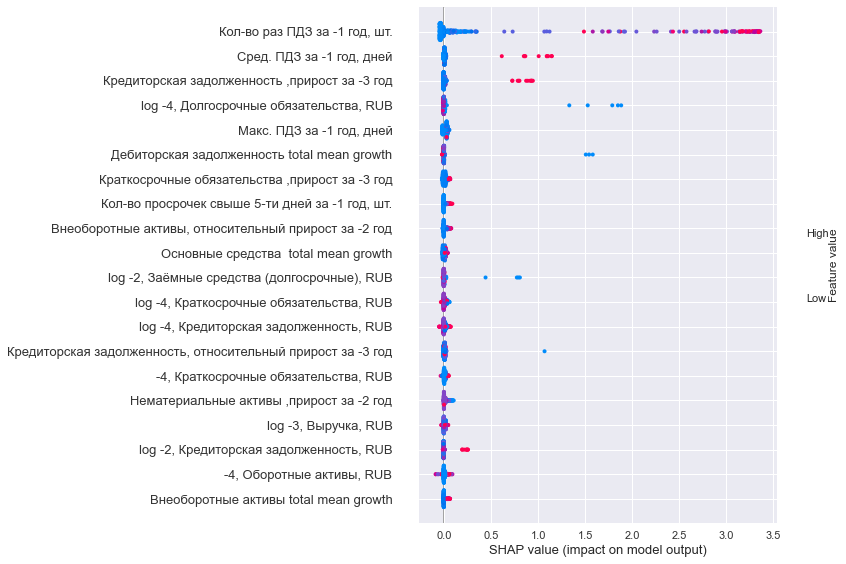

F1 = 0.3017, Precision = 0.3971, Recall = 0.2432, Accuracy = 0.6154, ROC_AUC = 0.6732
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1C73670> with treshold = 0.08...


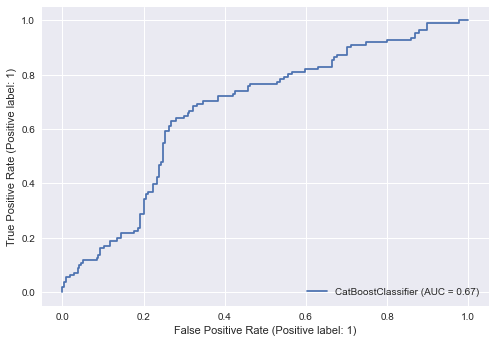

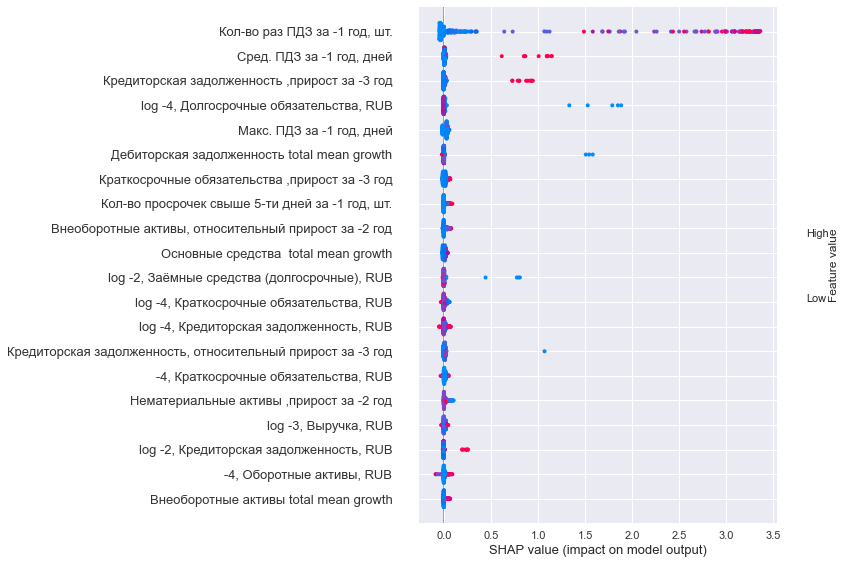

F1 = 0.5946, Precision = 0.5203, Recall = 0.6937, Accuracy = 0.6769, ROC_AUC = 0.6732
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C22A6850> with treshold = 0.5...


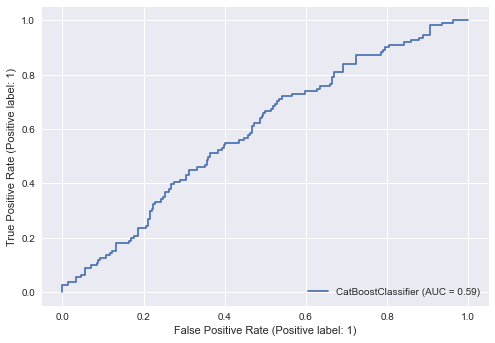

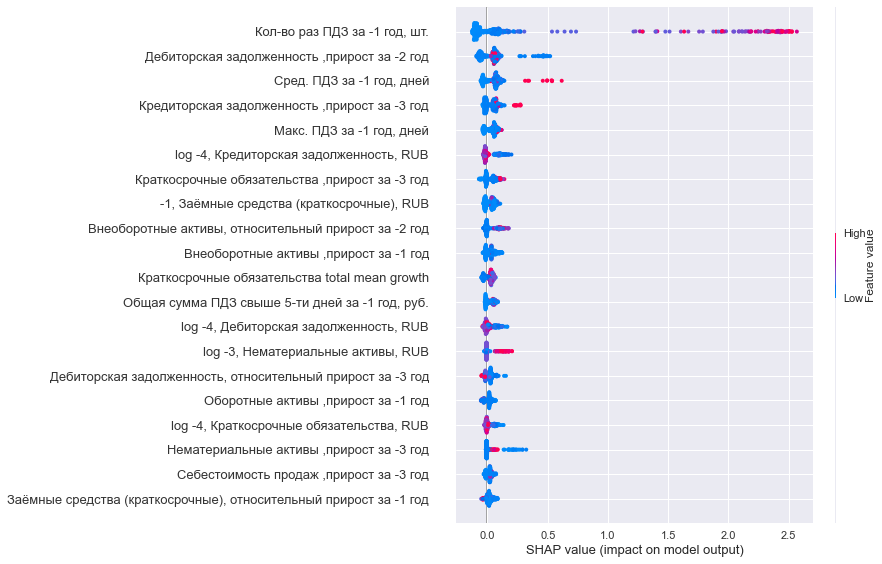

F1 = 0.4167, Precision = 0.4286, Recall = 0.4054, Accuracy = 0.6123, ROC_AUC = 0.5919
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C22A6850> with treshold = 0.22...


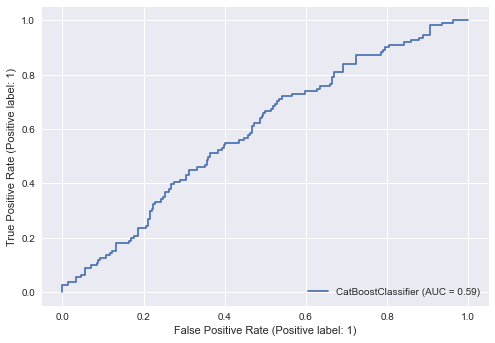

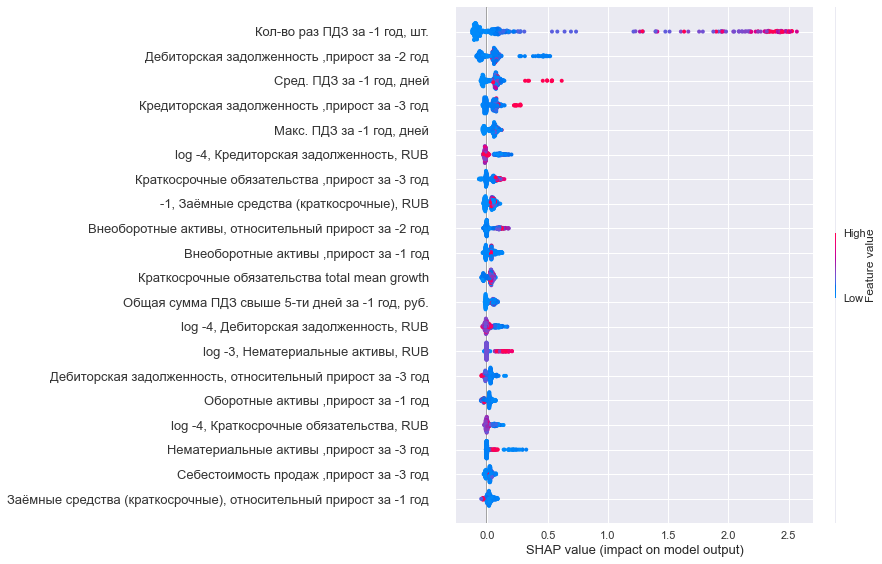

F1 = 0.5344, Precision = 0.3849, Recall = 0.8739, Accuracy = 0.48, ROC_AUC = 0.5919


In [91]:
# 1000 iters
# {'class_w': 0.14846074739222617, 'learning_rate': 0.0024817406509043795}
# {'class_w': 0.05147444902080074, 'learning_rate': 0.00697732595493729}

# 500 iters
# {'class_w': 0.02717153143772547, 'learning_rate': 0.0143344193095175}

for w in np.logspace(-6, -1, 10):
    model = CatBoostClassifier(iterations=500,
                               depth=5, 
                               l2_leaf_reg=5, 
                               learning_rate=0.0143344193095175,
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, w], # 0.00059948425
                               random_seed=RANDOM_STATE,
                              )

    make_report(model, df, #[[col for col in df.columns if 'log' in col or 'total mean growth' in col] + ness_cols], 
                treshold=0.5, to_file=False, file_path='../reports/report_petr.csv', 
                create_new_clients=False, comment=f'');

    X_train, X_test, y_train, y_test = data_split(df)
    probas = model.predict_proba(X_test)[:, 1]

    best = 0
    xx = 0
    for x in sorted(probas):
        pr = precision_score(y_test, probas >= x)
        rl = recall_score(y_test, probas >= x)
        best_ = f1_score(y_test, probas >= x)
        # best_ = pr * rl
        if best_ >= best:
            best = best_
            xx = x

    make_report(model, df,
                treshold=xx, to_file=True, file_path='../reports/report_petr.csv', 
                create_new_clients=False, comment=f'weight = {w}')

In [67]:
from sklearn.metrics import log_loss

def get_catboost_params(space):
    params = dict()
    # params['iterations'] = int(space['iterations'])
    params['learning_rate'] = space['learning_rate']
    # params['depth'] = int(space['depth'])
    # params['l2_leaf_reg'] = space['l2_leaf_reg']
    params['class_w'] = space['class_w']
    return params

obj_call_count = 0
cur_best_loss = np.inf
cur_best_score = 0

X_train, X_test, y_train, y_test = data_split(df, create_new_clients=0.5)

def objective(space):
    global obj_call_count, cur_best_score, cur_best_loss

    obj_call_count += 1

    print('\nCatBoost objective call #{} cur_best_score={:7.5f}'.format(obj_call_count, cur_best_score) )

    params = get_catboost_params(space)

    sorted_params = sorted(space.items(), key=lambda z: z[0])
    params_str = str.join(' ', ['{}={}'.format(k, v) for k, v in sorted_params])
    print('Params: {}'.format(params_str) )

    model = CatBoostClassifier(iterations=500, #params['iterations'],
                               depth=5, # params['depth'], 
                               l2_leaf_reg=5, #params['l2_leaf_reg'], 
                               learning_rate=params['learning_rate'],
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, params['class_w']],
                               random_seed=RANDOM_STATE,
                                )
    
    
    model, preds, probas = fit_predict(model, X_train, y_train, X_test, y_test, treshold=0.5, plot_roc_auc=False)
    f1, precision, recall, acc, roc_auc = make_scores(y_test, preds, probas=probas)
    test_loss = log_loss(y_test, preds, labels=[0, 1])

    nb_trees = model.tree_count_

    print('nb_trees={}'.format(nb_trees))

    # if roc_auc >= cur_best_score:
    #     cur_best_score = roc_auc
    #     print('\033[92m' + 'NEW BEST ROC_AUC={}'.format(cur_best_score) + '\033[0m')
    
    if test_loss < cur_best_loss:
        cur_best_loss = test_loss
        cur_best_score = roc_auc
        print('\033[92m' + 'NEW BEST LOSS={}'.format(cur_best_loss) + '\033[0m')
        print('\033[92m' + 'NEW BEST ROC_AUC={}'.format(roc_auc) + '\033[0m')


    return {'loss':test_loss, 'status': STATUS_OK }

In [68]:
space = {
    # 'depth': hp.quniform("depth", 2, 6, 1),
    # 'iterations': hp.quniform('iterations', 200, 5000, 1),
    'learning_rate': hp.loguniform('learning_rate', -6, -1),
    # 'l2_leaf_reg': hp.uniform('l2_leaf_reg', 3, 8),
    'class_w': hp.loguniform('class_w', -4, -1),
}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials,
    verbose=True
)

print('-'*50)
print('The best params:')
print( best )
print('\n\n')

                                                                                                                       
CatBoost objective call #1 cur_best_score=0.00000
Params: class_w=0.0794257397434542 learning_rate=0.3237429754712366                                                    
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C22E9430> with treshold = 0.5...                   
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

nb_trees=500                                                                                                           
NEW BEST LOSS=20.086045139080777                                                                              
NEW BEST ROC_AUC=0.6018354803401532                                                                           
                                                                                                                       
CatBoost objective call #2 cur_best_score=0.60184
Params: class_w=0.14694818915741753 learning_rate=0.29542028370733703                                                  
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C1B5EDC0> with treshold = 0.5...                   
nb_trees=500                                                                                                           
                                                                                                                       
CatBoost

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #34 cur_best_score=0.71942
Params: class_w=0.02197864236212645 learning_rate=0.01116148699872531                                                  
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2162760> with treshold = 0.5...                   
nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #35 cur_best_score=0.71942
Params: class_w=0.1158464154364058 learning_rate=0.14713234814566611                                                   
Fitting model <catboost.core.CatBoostClassifier object at 

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #39 cur_best_score=0.71942
Params: class_w=0.0271872317951222 learning_rate=0.00586062151994568                                                   
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2162760> with treshold = 0.5...                   
nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #40 cur_best_score=0.71942
Params: class_w=0.02212418614256936 learning_rate=0.008972876212668958                                                 
Fitting model <catboost.core.CatBoostClassifier object at 

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #71 cur_best_score=0.71942
Params: class_w=0.12155640155118166 learning_rate=0.07129401639443171                                                  
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C2162A00> with treshold = 0.5...                   
nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #72 cur_best_score=0.71942
Params: class_w=0.14857941511376888 learning_rate=0.020608299740651887                                                 
Fitting model <catboost.core.CatBoostClassifier object at 

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #86 cur_best_score=0.71643
Params: class_w=0.1940684740652639 learning_rate=0.017418599252649734                                                  
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C21C74F0> with treshold = 0.5...                   
nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #87 cur_best_score=0.71643
Params: class_w=0.15758170078848238 learning_rate=0.07605436219870203                                                  
Fitting model <catboost.core.CatBoostClassifier object at 

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #95 cur_best_score=0.71643
Params: class_w=0.23682753970954143 learning_rate=0.044796186220950204                                                 
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C21ABB50> with treshold = 0.5...                   
nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #96 cur_best_score=0.71643
Params: class_w=0.026883373498073355 learning_rate=0.002525235919713421                                                
Fitting model <catboost.core.CatBoostClassifier object at 

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #98 cur_best_score=0.71643
Params: class_w=0.17751807819628965 learning_rate=0.021111469961346167                                                 
Fitting model <catboost.core.CatBoostClassifier object at 0x000001F1C21C7370> with treshold = 0.5...                   
nb_trees=500                                                                                                           
                                                                                                                       
CatBoost objective call #99 cur_best_score=0.71643
Params: class_w=0.12631321270359339 learning_rate=0.03680044888121053                                                  
Fitting model <catboost.core.CatBoostClassifier object at 

Fitting model <catboost.core.CatBoostClassifier object at 0x000001F41CE23970> with treshold = 0.6...


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

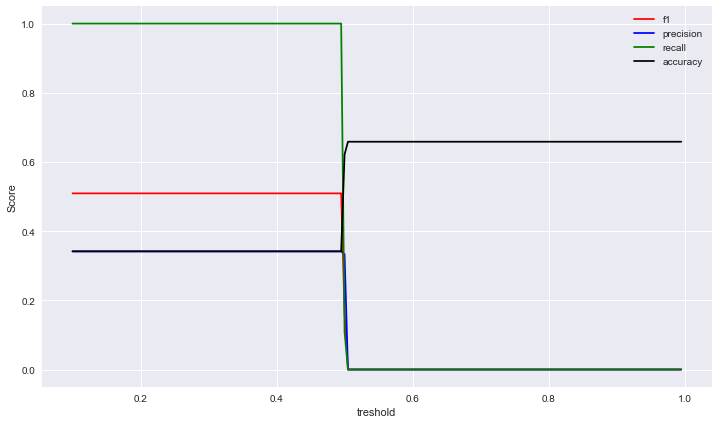

In [9]:
model = CatBoostClassifier(iterations=1000,
                           # depth=6.0, 
                           # l2_leaf_reg=4.17, 
                           learning_rate=1e-6,
                           loss_function='Logloss',
                           use_best_model=True,
                           eval_metric='F1',
                           verbose=False,
                           class_weights=[1, 1e-3],
                          )

#model = RandomForestClassifier(n_estimators=30)
validate_treshold(model, df)

In [25]:
X_train, X_test, y_train, y_test = data_split(df)

In [84]:
np.around(model.predict_proba(X_train)[:, 1][:100], 3)

array([0.001, 0.004, 0.004, 0.001, 0.003, 0.01 , 0.002, 0.001, 0.001,
       0.001, 0.002, 0.006, 0.001, 0.015, 0.009, 0.001, 0.   , 0.001,
       0.001, 0.014, 0.021, 0.001, 0.007, 0.004, 0.004, 0.001, 0.009,
       0.006, 0.009, 0.001, 0.001, 0.022, 0.034, 0.008, 0.001, 0.01 ,
       0.001, 0.001, 0.003, 0.002, 0.007, 0.005, 0.001, 0.015, 0.002,
       0.001, 0.001, 0.001, 0.009, 0.001, 0.001, 0.006, 0.001, 0.001,
       0.004, 0.001, 0.008, 0.003, 0.004, 0.001, 0.001, 0.011, 0.006,
       0.004, 0.002, 0.001, 0.009, 0.001, 0.002, 0.002, 0.001, 0.001,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001,
       0.001, 0.004, 0.009, 0.003, 0.001, 0.003, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001, 0.001, 0.011,
       0.001])

In [85]:
probas = model.predict_proba(X_test)[:, 1]

In [86]:
np.around(probas[:100], 3)

array([0.007, 0.004, 0.006, 0.007, 0.007, 0.001, 0.001, 0.001, 0.001,
       0.003, 0.001, 0.001, 0.001, 0.001, 0.002, 0.004, 0.006, 0.001,
       0.012, 0.012, 0.01 , 0.001, 0.   , 0.005, 0.004, 0.003, 0.001,
       0.008, 0.001, 0.006, 0.007, 0.012, 0.001, 0.001, 0.015, 0.001,
       0.002, 0.027, 0.001, 0.006, 0.026, 0.002, 0.006, 0.009, 0.001,
       0.004, 0.004, 0.005, 0.007, 0.002, 0.001, 0.01 , 0.008, 0.003,
       0.002, 0.002, 0.001, 0.001, 0.001, 0.006, 0.002, 0.001, 0.001,
       0.007, 0.001, 0.001, 0.008, 0.006, 0.001, 0.002, 0.001, 0.023,
       0.002, 0.007, 0.001, 0.01 , 0.007, 0.002, 0.012, 0.002, 0.011,
       0.001, 0.008, 0.001, 0.001, 0.001, 0.002, 0.001, 0.001, 0.001,
       0.004, 0.001, 0.005, 0.001, 0.001, 0.001, 0.002, 0.001, 0.   ,
       0.002])

In [87]:
best = 0
xx = 0
for x in sorted(probas):
    pr = precision_score(y_test, probas >= x)
    rl = recall_score(y_test, probas >= x)
    best_ = f1_score(y_test, probas >= x)
    # best_ = pr * rl
    if best_ >= best:
        best = best_
        xx = x


In [88]:
xx

0.00174510232312193

In [89]:
f1_score(y_test, probas >= xx), precision_score(y_test, probas >= xx), recall_score(y_test, probas >= xx)

(0.6345381526104418, 0.572463768115942, 0.7117117117117117)